# Esercizio 4 - Frode

## 1. Analisi Dimensionale: determina l'estensione del dataset: quante transazioni sono registrate e quanti dettagli (colonne) sono disponibili per ognuna.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import category_encoders as ce

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE,RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

import warnings
warnings.filterwarnings('ignore')

# Configurazione dello stile dei grafici
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("✓ Librerie importate con successo!")

# Caricamento del dataset
dataset_path = Path('../dataset/frode.csv')
df = pd.read_csv(dataset_path)

print(f"Dimensioni del dataset: {df.shape}")
print(f"\nColonne: {list(df.columns)}")

✓ Librerie importate con successo!
Dimensioni del dataset: (594643, 10)

Colonne: ['step', 'customer', 'age', 'gender', 'zipcodeOri', 'merchant', 'zipMerchant', 'category', 'amount', 'fraud']


## 2. Anteprima: mostra le prime righe del dataset per capire come sono catalogate le transazioni, le categorie di spesa e i flag di frode.

In [2]:
print("\nPrime righe del dataset:")
df.head(10)


Prime righe del dataset:


,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0
5,0,'C1315400589','3','F','28007','M348934600','28007','es_transportation',25.81,0
6,0,'C765155274','1','F','28007','M348934600','28007','es_transportation',9.10,0
7,0,'C202531238','4','F','28007','M348934600','28007','es_transportation',21.17,0
8,0,'C105845174','3','M','28007','M348934600','28007','es_transportation',32.40,0
9,0,'C39858251','5','F','28007','M348934600','28007','es_transportation',35.40,0


## 3. Tipi e valori mancanti: ispeziona il tipo di dato di ogni colonna (numerico, testuale, ecc.) e controlla se ci sono dati mancanti che potrebbero invalidare l'analisi

In [3]:
# Tipi e valori mancanti
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         594643 non-null  int64  
 1   customer     594643 non-null  object 
 2   age          594643 non-null  object 
 3   gender       594643 non-null  object 
 4   zipcodeOri   594643 non-null  object 
 5   merchant     594643 non-null  object 
 6   zipMerchant  594643 non-null  object 
 7   category     594643 non-null  object 
 8   amount       594643 non-null  float64
 9   fraud        594643 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 45.4+ MB


step           0
customer       0
age            0
gender         0
zipcodeOri     0
merchant       0
zipMerchant    0
category       0
amount         0
fraud          0
dtype: int64

## 4. Statistica Descrittiva: genera un riepilogo statistico per comprendere la media degli importi, la variabilità e la presenza di valori estremi nelle transazioni.

In [4]:
print(f"\nRiepilogo statistico:")
print(f"Min: {df['amount'].min()}")
print(f"Max: {df['amount'].max()}")
print(f"Media: {df['amount'].mean()}")
print(f"Variabilità: {df['amount'].std()}")



Riepilogo statistico:
Min: 0.0
Max: 8329.96
Media: 37.8901353080756
Variabilità: 111.40283093084041


# Parte 2 - Visualizzazioni e Analisi Grafica

## 1. Analisi del Bilanciamento (Target): Distribuzione della Frode

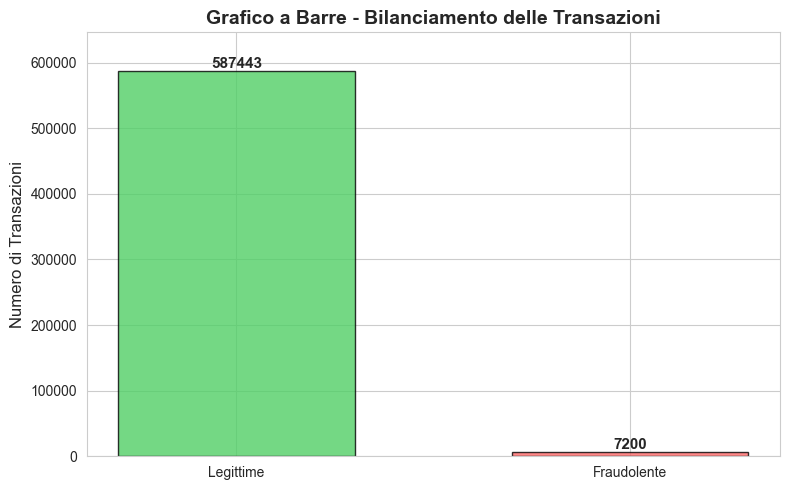

In [5]:
# Conteggio delle transazioni per tipo
transazioni = df['fraud'].value_counts()

plt.figure(figsize=(8, 5))
features = ['Legittime', 'Fraudolente']
colors = ['#51CF66', '#FF6B6B']
bars = plt.bar(features, transazioni.values, color=colors, edgecolor='black', alpha=0.8, width=0.6)

plt.ylabel('Numero di Transazioni', fontsize=12)
plt.title('Grafico a Barre - Bilanciamento delle Transazioni', fontsize=14, fontweight='bold')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{int(height)}', ha='center', va='bottom', fontweight='bold', fontsize=11)

plt.ylim(0, max(transazioni.values)*1.1)
plt.tight_layout()
plt.show()

## 2. Profilo degli Importi: Distribuzione della Variabile Amount

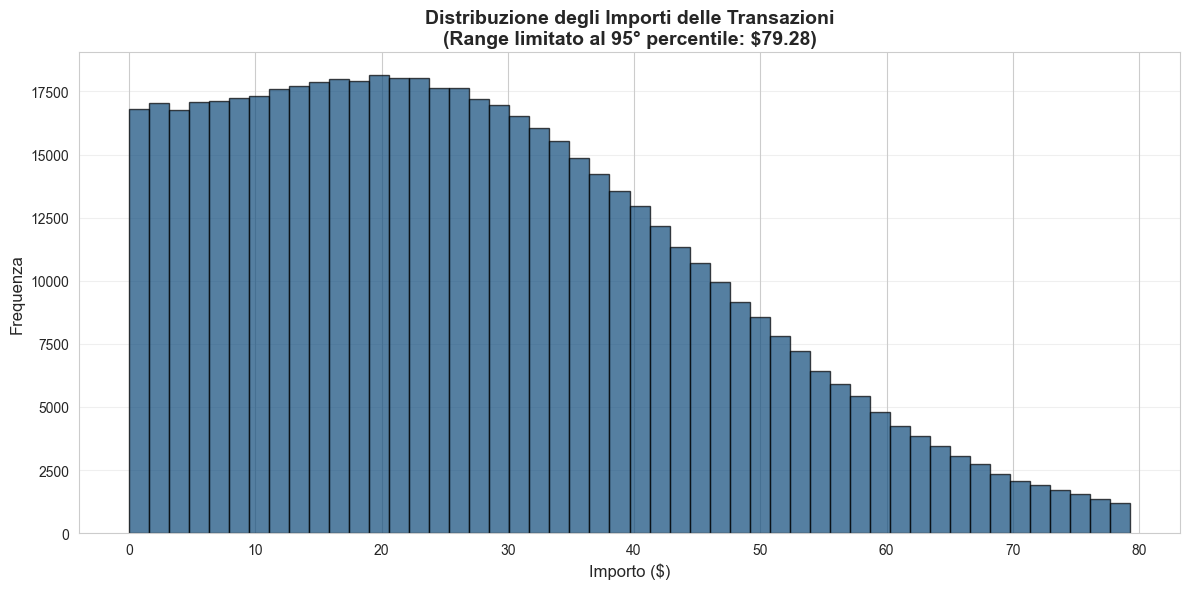

In [6]:
# Limita il range al 95° percentile per evitare valori estremi
limite = df['amount'].quantile(0.95)
filtro = df[df['amount'] <= limite]

plt.figure(figsize=(12, 6))
plt.hist(filtro['amount'], bins=50, color="#0d497a", edgecolor='black', alpha=0.7)
plt.xlabel('Importo ($)', fontsize=12)
plt.ylabel('Frequenza', fontsize=12)
plt.title(f'Distribuzione degli Importi delle Transazioni\n(Range limitato al 95° percentile: ${limite:.2f})', 
          fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## 3. Confronto Finanziario: BoxPlot Amount vs Fraud

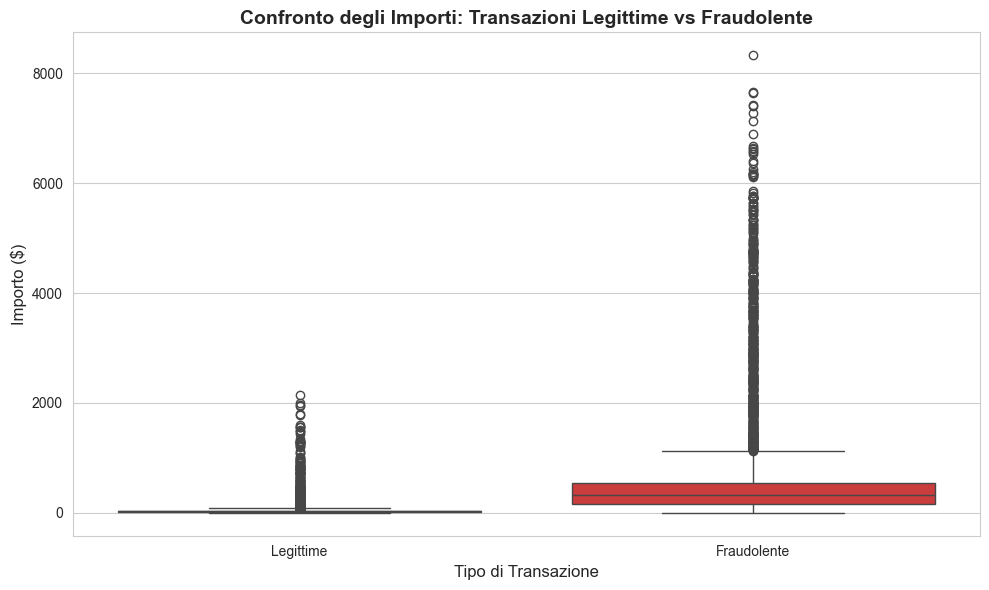

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='fraud', y='amount', hue='fraud', palette=["#20CC3D", "#E02626"],legend=False)
plt.xlabel('Tipo di Transazione', fontsize=12)
plt.ylabel('Importo ($)', fontsize=12)
plt.title('Confronto degli Importi: Transazioni Legittime vs Fraudolente', fontsize=14, fontweight='bold')
plt.xticks([0, 1], ['Legittime', 'Fraudolente'])
plt.tight_layout()
plt.show()

## 4. Analisi dei Volumi per Categoria

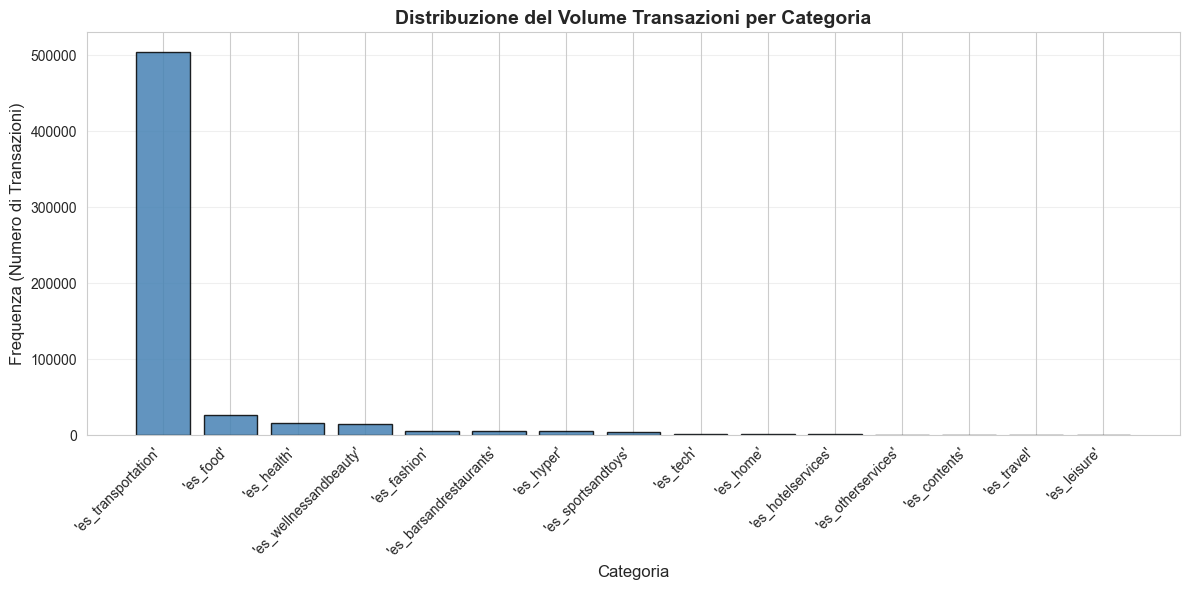

In [8]:
# Conta e ordina le categorie per frequenza
categoria = df['category'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(categoria.index, categoria.values, color='steelblue', edgecolor='black', alpha=0.85)
plt.xlabel('Categoria', fontsize=12)
plt.ylabel('Frequenza (Numero di Transazioni)', fontsize=12)
plt.title('Distribuzione del Volume Transazioni per Categoria', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## 5. Focus sulle categorie a rischio: crea un grafico che isoli e mostri esclusivamente il numero di transazioni fraudolente suddivise per categoria, per identificare quali settori merceologici sono i bersagli preferiti dei truffatori.

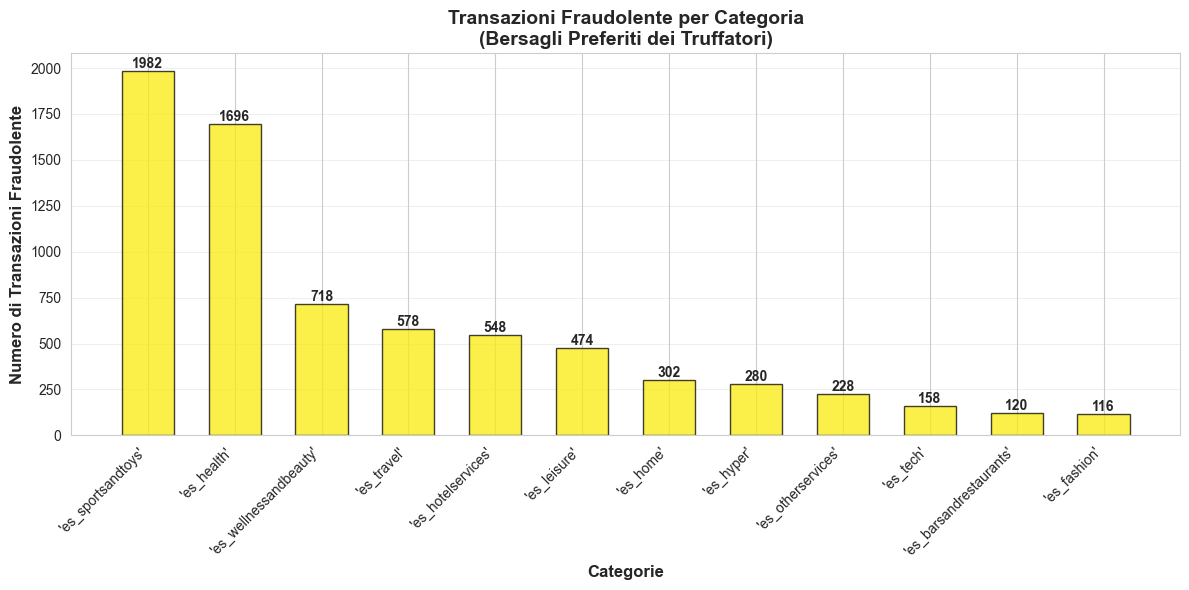

In [9]:
# Filtra solo le transazioni fraudolente
fraudolente = df[df['fraud'] == 1]
categoriefraudolente = fraudolente['category'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
bars = plt.bar(categoriefraudolente.index, categoriefraudolente.values, 
               color="#FAEA0C", edgecolor='black', alpha=0.75, width=0.6)

plt.xlabel('Categorie', fontsize=12, fontweight='bold')
plt.ylabel('Numero di Transazioni Fraudolente', fontsize=12, fontweight='bold')
plt.title('Transazioni Fraudolente per Categoria\n(Bersagli Preferiti dei Truffatori)', 
          fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Aggiungi valori sulle barre
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}', ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

## 6. Mappa delle relazioni numeriche: calcola la matrice di correlazione tra le variabili numeriche e rappresentala con una heatmap, per scoprire se esiste un legame lineare tra l'importo e la probabilità di frode.

Matrice di Correlazione:
            step    amount     fraud
step    1.000000 -0.007961 -0.011898
amount -0.007961  1.000000  0.489967
fraud  -0.011898  0.489967  1.000000

Correlazione tra 'amount' e 'fraud':
0.4900


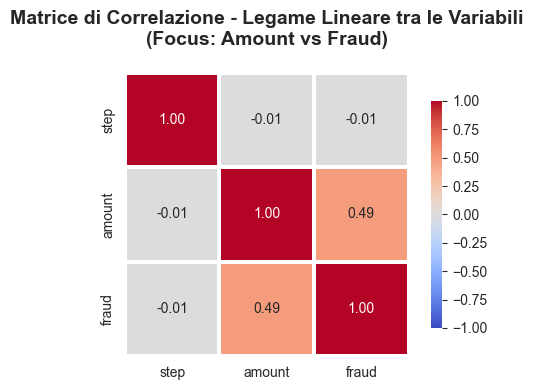

In [10]:
# Seleziona solo le colonne numeriche
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()

# Calcola la matrice di correlazione
correlation_matrix = df[numeric_cols].corr()

print("Matrice di Correlazione:")
print(correlation_matrix)

print("\nCorrelazione tra 'amount' e 'fraud':")
print(f"{correlation_matrix.loc['amount', 'fraud']:.4f}")

# Crea la heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, linewidths=1.5, cbar_kws={"shrink": 0.8},
            vmin=-1, vmax=1, center=0)
plt.title('Matrice di Correlazione - Legame Lineare tra le Variabili\n(Focus: Amount vs Fraud)', 
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# PREPROCESSING

In [11]:
# Controllo dei valori mancanti (incluso '?')
print("Valori mancanti per colonna:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


Valori mancanti per colonna:
Series([], dtype: int64)


In [12]:
## essendo che non ci sono valori mancanti si salta il passaggio perche' non serve

# SEPARAZIONE TRA COLONNE NUMERICHE E CATEGORICHE

In [13]:
# Identificazione delle colonne numeriche e categoriche
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()


# Rimuoviamo la variabile target dalla lista delle categoriche
if 'fraud' in categorical_cols:
    categorical_cols.remove('fraud')

print(f"Colonne numeriche ({len(numerical_cols)}): {numerical_cols}")
print(f"\nColonne categoriche ({len(categorical_cols)}): {categorical_cols}")


Colonne numeriche (3): ['step', 'amount', 'fraud']

Colonne categoriche (7): ['customer', 'age', 'gender', 'zipcodeOri', 'merchant', 'zipMerchant', 'category']


In [14]:
## colonne encodate con label encoding -- age 
## colonne con il one hot encoding -- gender - category
## colonne in binary encoding -- customer - zipcodeOri - zipMerchant - merchant 
binary_cols = ['customer', 'zipcodeOri', 'zipMerchant', 'merchant']
one_hot_cols = ['gender', 'category']
label_cols = ['age']

# --- LABEL ENCODING --- // usato perche' cmq l'eta' e' un numero che pero' e' stato inserito come stringa quindi non si ha un cambio di significato 
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col].astype(str))

# --- BINARY ENCODING --- // utilizzato al posto di ONE HOT perche' ci sono un sacco di dati diversi e altrimenti si verrebbo a creare molte colonne che renderebbero il dataset molto pesante 
be = ce.BinaryEncoder(cols=binary_cols)
df = be.fit_transform(df)

# --- ONE HOT ENCODING --- 
df_encoded = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)

print(f"Forma del dataset finale: {df_encoded.shape}")

print("\nPrime 10 righe del dataset encodato:")
print(df_encoded.head(5))




Forma del dataset finale: (594643, 42)

Prime 10 righe del dataset encodato:
   step  customer_0  customer_1  customer_2  customer_3  customer_4  \
0     0           0           0           0           0           0   
1     0           0           0           0           0           0   
2     0           0           0           0           0           0   
3     0           0           0           0           0           0   
4     0           0           0           0           0           0   

   customer_5  customer_6  customer_7  customer_8  ...  category_'es_home'  \
0           0           0           0           0  ...               False   
1           0           0           0           0  ...               False   
2           0           0           0           0  ...               False   
3           0           0           0           0  ...               False   
4           0           0           0           0  ...               False   

   category_'es_hotelservic

# SEPARAZIONE DELLE FEATURE DAL TARGET 

In [15]:
# Separazione delle feature e del target
X = df_encoded.drop('fraud', axis=1)
y = df_encoded['fraud']

print(f"Shape delle feature (X): {X.shape}")
print(f"Shape del target (y): {y.shape}")
print(f"\nDistribuzione del target:")
print(y.value_counts())

Shape delle feature (X): (594643, 41)
Shape del target (y): (594643,)

Distribuzione del target:
fraud
0    587443
1      7200
Name: count, dtype: int64


# SUDDIVISIONE TRAIN E TEST

In [16]:
# Split train/test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y  # Manteniamo la stessa proporzione delle classi
)

print(f"Dimensioni del training set: {X_train.shape}")
print(f"Dimensioni del test set: {X_test.shape}")
print(f"\nDistribuzione delle classi nel training set:")
print(y_train.value_counts())
print(f"\nDistribuzione delle classi nel test set:")
print(y_test.value_counts())

Dimensioni del training set: (475714, 41)
Dimensioni del test set: (118929, 41)

Distribuzione delle classi nel training set:
fraud
0    469954
1      5760
Name: count, dtype: int64

Distribuzione delle classi nel test set:
fraud
0    117489
1      1440
Name: count, dtype: int64


# BILANCIAMENTO

In [17]:
pipeline = Pipeline(steps=[
    ('over', RandomOverSampler(sampling_strategy=0.5)),
    ('under', RandomUnderSampler(sampling_strategy=1.0))
])
X_train_res, y_train_res = pipeline.fit_resample(X_train,y_train)


print("\n Bilanciamento applicato con successo!")
print(f"\n Dimensioni PRIMA del bilanciamento:")
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"\nDimensioni DOPO bilanciamento:")
print(f"X_train_balanced: {X_train_res.shape}")
print(f"y_train_balanced: {y_train_res.shape}")

print(f"\nDistribuzione del target:")
print(y_train_res.value_counts())



 Bilanciamento applicato con successo!

 Dimensioni PRIMA del bilanciamento:
X_train: (475714, 41)
y_train: (475714,)

Dimensioni DOPO bilanciamento:
X_train_balanced: (469954, 41)
y_train_balanced: (469954,)

Distribuzione del target:
fraud
0    234977
1    234977
Name: count, dtype: int64


# NORMALIZZAZIONE

In [18]:
scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)


# CLASSIC ML

## random forest

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, average_precision_score

# Inizializzazione con class_weight='balanced' per gestire lo sbilanciamento
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train_res, y_train_res)

y_pred_rf = rf_model.predict(X_test)

## KNN

In [20]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_res, y_train_res)

y_pred_knn = knn_model.predict(X_test)

## adaboost con grind search 

In [21]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

ada_search = GridSearchCV(AdaBoostClassifier(random_state=42), param_grid, cv=5, scoring='f1',n_jobs=-1)
ada_search.fit(X_train_res, y_train_res)

best_ada = ada_search.best_estimator_
y_pred_ada = best_ada.predict(X_test)

## valutazione performance

In [22]:




models = {"Random Forest": y_pred_rf, "KNN": y_pred_knn, "AdaBoost": y_pred_ada}

for name, pred in models.items():
    print(f"--- Report per {name} ---")
    print(classification_report(y_test, pred))
    print(f"AUPRC: {average_precision_score(y_test, pred):.2f}")
    print(confusion_matrix(y_test, pred))
    print("\n")

--- Report per Random Forest ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    117489
           1       0.79      0.86      0.82      1440

    accuracy                           1.00    118929
   macro avg       0.89      0.93      0.91    118929
weighted avg       1.00      1.00      1.00    118929

AUPRC: 0.68
[[117153    336]
 [   201   1239]]


--- Report per KNN ---
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    117489
           1       0.42      0.87      0.57      1440

    accuracy                           0.98    118929
   macro avg       0.71      0.93      0.78    118929
weighted avg       0.99      0.98      0.99    118929

AUPRC: 0.37
[[115773   1716]
 [   192   1248]]


--- Report per AdaBoost ---
              precision    recall  f1-score   support

           0       1.00      0.94      0.97    117489
           1       0.18      0.98      0.30      1440

